# Question 1

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
pd.set_option('display.max_columns',None)

In [2]:
data=pd.read_excel('Q1.xlsx')
print(data)

    Day Positive Comment?
0     1               Yes
1     2               Yes
2     3               Yes
3     4               Yes
4     5               Yes
5     6                No
6     7               Yes
7     8               Yes
8     9               Yes
9    10                No
10   11               Yes
11   12               Yes
12   13               Yes
13   14               Yes
14   15                No
15   16                No
16   17                No
17   18               Yes
18   19               Yes
19   20               Yes


In [3]:
data.dtypes

Day                   int64
Positive Comment?    object
dtype: object

In [4]:
###Create a binary column to convert above or below to 1/0
data['Positive Comment (Binary)']= np.where(data['Positive Comment?'] == 'Yes',1,0)
data

,Day,Positive Comment?,Positive Comment (Binary)
0,1,Yes,1
1,2,Yes,1
2,3,Yes,1
3,4,Yes,1
4,5,Yes,1
5,6,No,0
6,7,Yes,1
7,8,Yes,1
8,9,Yes,1
9,10,No,0


In [5]:
data.dtypes

Day                           int64
Positive Comment?            object
Positive Comment (Binary)     int32
dtype: object

In [6]:
###Cumulative sum for ['Positive Comment (Binary)'] == 1 (= Yes)
data['Cum_Sum_1'] = (data['Positive Comment (Binary)'] == 1).cumsum()

In [7]:
data1 = pd.DataFrame(data,columns = ['Day','Positive Comment (Binary)', 'Cum_Sum_1'])
data1

,Day,Positive Comment (Binary),Cum_Sum_1
0,1,1,1
1,2,1,2
2,3,1,3
3,4,1,4
4,5,1,5
5,6,0,5
6,7,1,6
7,8,1,7
8,9,1,8
9,10,0,8


In [8]:
data1['Consecutive Complaints'] = data1.groupby(data['Cum_Sum_1']).cumcount()
data1
print(data1.dtypes)

Day                          int64
Positive Comment (Binary)    int32
Cum_Sum_1                    int32
Consecutive Complaints       int64
dtype: object


In [9]:
#Calculation of R = count No / count Yes
count_Yes = data1.loc[data1['Positive Comment (Binary)']==1,'Positive Comment (Binary)'].count()
count_No = data1.loc[data1['Positive Comment (Binary)']==0,'Positive Comment (Binary)'].count()
R = count_No/count_Yes
print(R)

0.3333333333333333


In [10]:
#Calculate the Upper Control Limit
data1['UCL'] = (R +3*(math.sqrt(R*(1+R)))).round(3)
data1.head()

,Day,Positive Comment (Binary),Cum_Sum_1,Consecutive Complaints,UCL
0,1,1,1,0,2.333
1,2,1,2,0,2.333
2,3,1,3,0,2.333
3,4,1,4,0,2.333
4,5,1,5,0,2.333


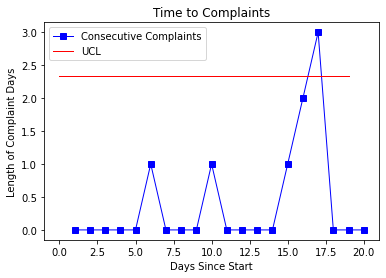

In [13]:
#Plot the graph
plt.plot('Day','Consecutive Complaints',data=data1,marker='s',markerfacecolor='b',linewidth=1,color='b')
plt.plot('UCL',data=data1,markersize=0,color='r',linewidth=1)
plt.legend()
plt.title('Time to Complaints')
plt.xlabel('Days Since Start')
plt.ylabel('Length of Complaint Days')
plt.show()

# Question1-1

In health administration programs, data on waiting time are examined in courses on quality and operations research.  Using the attached data, determine if the waiting time in our urgent care center has changed?

In [18]:
data=pd.read_excel('Q1_1.xlsx',index_col=0)
data.head()

,1,2,3,4,5,6,7,8
Time period,,,,,,,,
Observations,90,85,92,67,98,83,94,90


In [19]:
data1=data.T
data1

Time period,Observations
1,90
2,85
3,92
4,67
5,98
6,83
7,94
8,90


In [20]:
#Step1. rename the index column
data1.index = data1.index.set_names('TimePeriod')
data1.columns = ['Observations']

#Step2. restting the index and releosing the timeperiod column
data1 = data1.reset_index()
data1

,TimePeriod,Observations
0,1,90
1,2,85
2,3,92
3,4,67
4,5,98
5,6,83
6,7,94
7,8,90


In [23]:
data1.describe()

,TimePeriod,Observations
count,8.00000,8.00000
mean,4.50000,87.37500
std,2.44949,9.50094
min,1.00000,67.00000
25%,2.75000,84.50000
50%,4.50000,90.00000
75%,6.25000,92.50000
max,8.00000,98.00000


In [24]:
data1['lower_fourth']=84.5
data1['Upper_fourth']=92.5
data1['fourth_spreads']=data1['Upper_fourth']-data1['lower_fourth']
data1

,TimePeriod,Observations,lower_fourth,Upper_fourth,fourth_spreads
0,1,90,84.5,92.5,8.0
1,2,85,84.5,92.5,8.0
2,3,92,84.5,92.5,8.0
3,4,67,84.5,92.5,8.0
4,5,98,84.5,92.5,8.0
5,6,83,84.5,92.5,8.0
6,7,94,84.5,92.5,8.0
7,8,90,84.5,92.5,8.0


In [27]:
data1['UCL']=data1['Upper_fourth']+1.5*data1['fourth_spreads']
data1['LCL']=data1['Upper_fourth']-1.5*data1['fourth_spreads']
print(data1)

   TimePeriod  Observations  lower_fourth  Upper_fourth  fourth_spreads  \
0           1            90          84.5          92.5             8.0   
1           2            85          84.5          92.5             8.0   
2           3            92          84.5          92.5             8.0   
3           4            67          84.5          92.5             8.0   
4           5            98          84.5          92.5             8.0   
5           6            83          84.5          92.5             8.0   
6           7            94          84.5          92.5             8.0   
7           8            90          84.5          92.5             8.0   

     UCL   LCL  
0  104.5  80.5  
1  104.5  80.5  
2  104.5  80.5  
3  104.5  80.5  
4  104.5  80.5  
5  104.5  80.5  
6  104.5  80.5  
7  104.5  80.5  


<function matplotlib.pyplot.show(*args, **kw)>

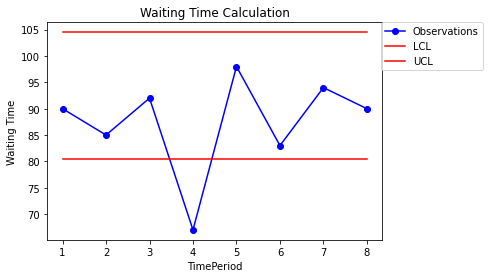

In [29]:
ax=plt.gca()
data1.plot(kind='line',x='TimePeriod',y='Observations',color='blue',marker='o',ax=ax)
data1.plot(kind='line',x='TimePeriod',y='LCL',color='red',ax=ax)
data1.plot(kind='line',x='TimePeriod',y='UCL',color='red',ax=ax)
plt.title('Waiting Time Calculation')
plt.ylabel('Waiting Time')
plt.legend(bbox_to_anchor=(1.3,1),loc='upper right',borderaxespad=0)
plt.show

# Question 2

In [14]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import datetime
pd.set_option('display.max_columns',None)

In [17]:
data=pd.read_excel('Q2_Data.xlsx')
print(data)

   Measure ID  Provider ID Measure Start Date Measure End Date  Score  Sample
0       OP_21        10001         2013-04-01       2014-03-31     78     132
1       OP_21        10001         2013-07-01       2014-06-30     68     124
2       OP_21        10001         2013-10-01       2014-09-30     72     122
3       OP_21        10001         2014-01-01       2014-12-31     76     138
4       OP_21        10001         2014-04-01       2015-03-31     85     144
5       OP_21        10001         2014-07-01       2015-06-30     86     137
6       OP_21        10001         2014-10-01       2015-09-30     95     121
7       OP_21        10001         2015-01-01       2015-12-31     99     111


In [18]:
data.dtypes

 Measure ID                   object
Provider ID                    int64
Measure Start Date    datetime64[ns]
Measure End Date      datetime64[ns]
Score                          int64
Sample                         int64
dtype: object

In [19]:
###Check the data has missing value first.
Data_NULL = data.isnull().sum()*100/data.shape[0]
Data_NULL

 Measure ID           0.0
Provider ID           0.0
Measure Start Date    0.0
Measure End Date      0.0
Score                 0.0
Sample                0.0
dtype: float64

In [22]:
###Calcuate Midpoint Date: ( [Measure Start Date] + [Measure End Data] ) / 2  
data['Midpoint Date'] = data['Measure Start Date'] + (data['Measure End Date'] - data['Measure Start Date'] )/2
data

,Measure ID,Provider ID,Measure Start Date,Measure End Date,Score,Sample,Midpoint Date
0,OP_21,10001,2013-04-01,2014-03-31,78,132,2013-09-30
1,OP_21,10001,2013-07-01,2014-06-30,68,124,2013-12-30
2,OP_21,10001,2013-10-01,2014-09-30,72,122,2014-04-01
3,OP_21,10001,2014-01-01,2014-12-31,76,138,2014-07-02
4,OP_21,10001,2014-04-01,2015-03-31,85,144,2014-09-30
5,OP_21,10001,2014-07-01,2015-06-30,86,137,2014-12-30
6,OP_21,10001,2014-10-01,2015-09-30,95,121,2015-04-01
7,OP_21,10001,2015-01-01,2015-12-31,99,111,2015-07-02


In [23]:
###Benchmark value
data['Benchmark'] = 73

In [25]:
###Create a binary column to convert above or below to 1/0
data['Above Benchmark']= np.where((data['Score'] >= data['Benchmark']),1,0)
data

,Measure ID,Provider ID,Measure Start Date,Measure End Date,Score,Sample,Midpoint Date,Benchmark,Above Benchmark
0,OP_21,10001,2013-04-01,2014-03-31,78,132,2013-09-30,73,1
1,OP_21,10001,2013-07-01,2014-06-30,68,124,2013-12-30,73,0
2,OP_21,10001,2013-10-01,2014-09-30,72,122,2014-04-01,73,0
3,OP_21,10001,2014-01-01,2014-12-31,76,138,2014-07-02,73,1
4,OP_21,10001,2014-04-01,2015-03-31,85,144,2014-09-30,73,1
5,OP_21,10001,2014-07-01,2015-06-30,86,137,2014-12-30,73,1
6,OP_21,10001,2014-10-01,2015-09-30,95,121,2015-04-01,73,1
7,OP_21,10001,2015-01-01,2015-12-31,99,111,2015-07-02,73,1


In [26]:
###Create a binary column to convert above or below to 1/0
data['Cum_AboveBenchmark'] = (data['Above Benchmark'] == 1).cumsum()

In [27]:
data['Consecutive Below Benchmark'] = data.groupby(data['Cum_AboveBenchmark']).cumcount()
data

,Measure ID,Provider ID,Measure Start Date,Measure End Date,Score,Sample,Midpoint Date,Benchmark,Above Benchmark,Cum_AboveBenchmark,Consecutive Below Benchmark
0,OP_21,10001,2013-04-01,2014-03-31,78,132,2013-09-30,73,1,1,0
1,OP_21,10001,2013-07-01,2014-06-30,68,124,2013-12-30,73,0,1,1
2,OP_21,10001,2013-10-01,2014-09-30,72,122,2014-04-01,73,0,1,2
3,OP_21,10001,2014-01-01,2014-12-31,76,138,2014-07-02,73,1,2,0
4,OP_21,10001,2014-04-01,2015-03-31,85,144,2014-09-30,73,1,3,0
5,OP_21,10001,2014-07-01,2015-06-30,86,137,2014-12-30,73,1,4,0
6,OP_21,10001,2014-10-01,2015-09-30,95,121,2015-04-01,73,1,5,0
7,OP_21,10001,2015-01-01,2015-12-31,99,111,2015-07-02,73,1,6,0


In [28]:
count_Above = data.loc[data['Above Benchmark'] == 1, 'Above Benchmark'].count()
count_Below = data.loc[data['Above Benchmark'] == 0, 'Above Benchmark'].count()          

In [29]:
R_Above = count_Above/count_Below
R_Above

3.0

In [30]:
R_Below = count_Below/count_Above
R_Below

0.3333333333333333

In [31]:
###Calculation of Ratio = count_Below/count_Above
Ratio = count_Below/count_Above
Ratio

0.3333333333333333

In [32]:
### Calculate the upper control limit
data['UCL'] = (Ratio + 3*(math.sqrt(Ratio*(1+Ratio)))).round(2)

([<matplotlib.axis.YTick at 0x95f9538>,
 <a list of 6 Text major ticklabel objects>)

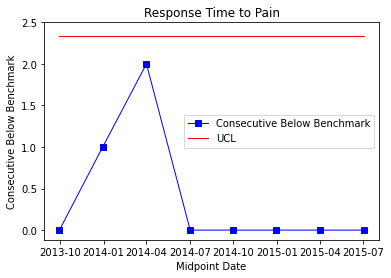

In [34]:
### Create the dataframe
plt.plot('Midpoint Date', 'Consecutive Below Benchmark', data=data1, marker = 's', 
         markerfacecolor='blue',linewidth=1,color='blue')
plt.plot('Midpoint Date','UCL',data=data1,markersize=5,color='red',linewidth=1)
plt.legend()
plt.title('Response Time to Pain')
plt.xlabel('Midpoint Date')
plt.ylabel('Consecutive Below Benchmark')
plt.yticks(np.arange(0,3,0.5))

# Question2-1

In [25]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [13]:
data1 = pd.read_csv('150122.csv')
data2 = pd.read_csv('150416.csv')
data3 = pd.read_csv('150506.csv')
data4 = pd.read_csv('150716.csv')
data5 = pd.read_csv('151008.csv')
data6 = pd.read_csv('151210.csv')
data7 = pd.read_csv('160504.csv')
data8 = pd.read_csv('160810.csv')
data9 = pd.read_csv('161110.csv')

In [14]:
data1=data1[(data1['Hospital Name']=='INOVA FAIRFAX HOSPITAL')&
             (data1['Measure ID']=='OP_21')]
data2=data2[(data2['Hospital Name']=='INOVA FAIRFAX HOSPITAL')&
             (data2['Measure ID']=='OP_21')]
data3=data3[(data3['Hospital Name']=='INOVA FAIRFAX HOSPITAL')&
             (data3['Measure ID']=='OP_21')]
data4=data4[(data4['Hospital Name']=='INOVA FAIRFAX HOSPITAL')&
             (data4['Measure ID']=='OP_21')]
data5=data5[(data5['Hospital Name']=='INOVA FAIRFAX HOSPITAL')&
             (data5['Measure ID']=='OP_21')]
data6=data6[(data6['Hospital Name']=='INOVA FAIRFAX HOSPITAL')&
             (data6['Measure ID']=='OP_21')]
data7=data7[(data7['Hospital Name']=='INOVA FAIRFAX HOSPITAL')&
             (data7['Measure ID']=='OP_21')]
data8=data8[(data8['Hospital Name']=='INOVA FAIRFAX HOSPITAL')&
             (data8['Measure ID']=='OP_21')]
data9=data9[(data9['Hospital Name']=='INOVA FAIRFAX HOSPITAL')&
             (data9['Measure ID']=='OP_21')]

In [38]:
df=pd.concat([data1,data2,data3,data4,data5,data6,data7,data8,data9],ignore_index=True)
df['Measure Start Date']=pd.to_datetime(df['Measure Start Date'])
df['Measure End Date']=pd.to_datetime(df['Measure End Date'])
df['Mid']=df['Measure Start Date']+(df['Measure End Date']-df['Measure Start Date'])/2
df.drop_duplicates(inplace=True,ignore_index=True)
df['Score']=df['Score'].astype(float)
df

,Provider ID,Hospital Name,Condition,Measure ID,Measure Name,Score,Sample,Footnote,Measure Start Date,Measure End Date,Mid
0,490063,INOVA FAIRFAX HOSPITAL,Emergency Department,OP_21,Median time to pain med,44.0,379,NaN,2013-04-01,2014-03-31,2013-09-30
1,490063,INOVA FAIRFAX HOSPITAL,Emergency Department,OP_21,Median time to pain med,37.0,342,NaN,2013-07-01,2014-06-30,2013-12-30
2,490063,INOVA FAIRFAX HOSPITAL,Emergency Department,OP_21,Median time to pain med,36.0,314,NaN,2013-10-01,2014-09-30,2014-04-01
3,490063,INOVA FAIRFAX HOSPITAL,Emergency Department,OP_21,Median time to pain med,37.0,336,NaN,2014-01-01,2014-12-31,2014-07-02
4,490063,INOVA FAIRFAX HOSPITAL,Emergency Department,OP_21,Median time to pain med,36.0,349,NaN,2014-04-01,2015-03-31,2014-09-30
5,490063,INOVA FAIRFAX HOSPITAL,Emergency Department,OP_21,Median time to pain med,36.0,347,NaN,2014-07-01,2015-06-30,2014-12-30
6,490063,INOVA FAIRFAX HOSPITAL,Emergency Department,OP_21,Median time to pain med,34.0,342,NaN,2014-10-01,2015-09-30,2015-04-01
7,490063,INOVA FAIRFAX HOSPITAL,Emergency Department,OP_21,Median time to pain med,31.0,317,NaN,2015-01-01,2015-12-31,2015-07-02


In [39]:
Median=df['Score'].median()
Median

36.0

In [40]:
Lower_Fourth=df.loc[4:,'Score'].median()
Lower_Fourth

35.0

In [41]:
Upper_Fourth=df.loc[:6,'Score'].median()
Upper_Fourth

36.0

In [42]:
Fourth_Spread = Upper_Fourth - Lower_Fourth
Fourth_Spread

1.0

In [43]:
LCL = Lower_Fourth - 1.5 * Fourth_Spread
UCL = Upper_Fourth + 1.5 * Fourth_Spread
LCL,UCL

(33.5, 37.5)

Text(0, 0.5, 'Midpoint Time')

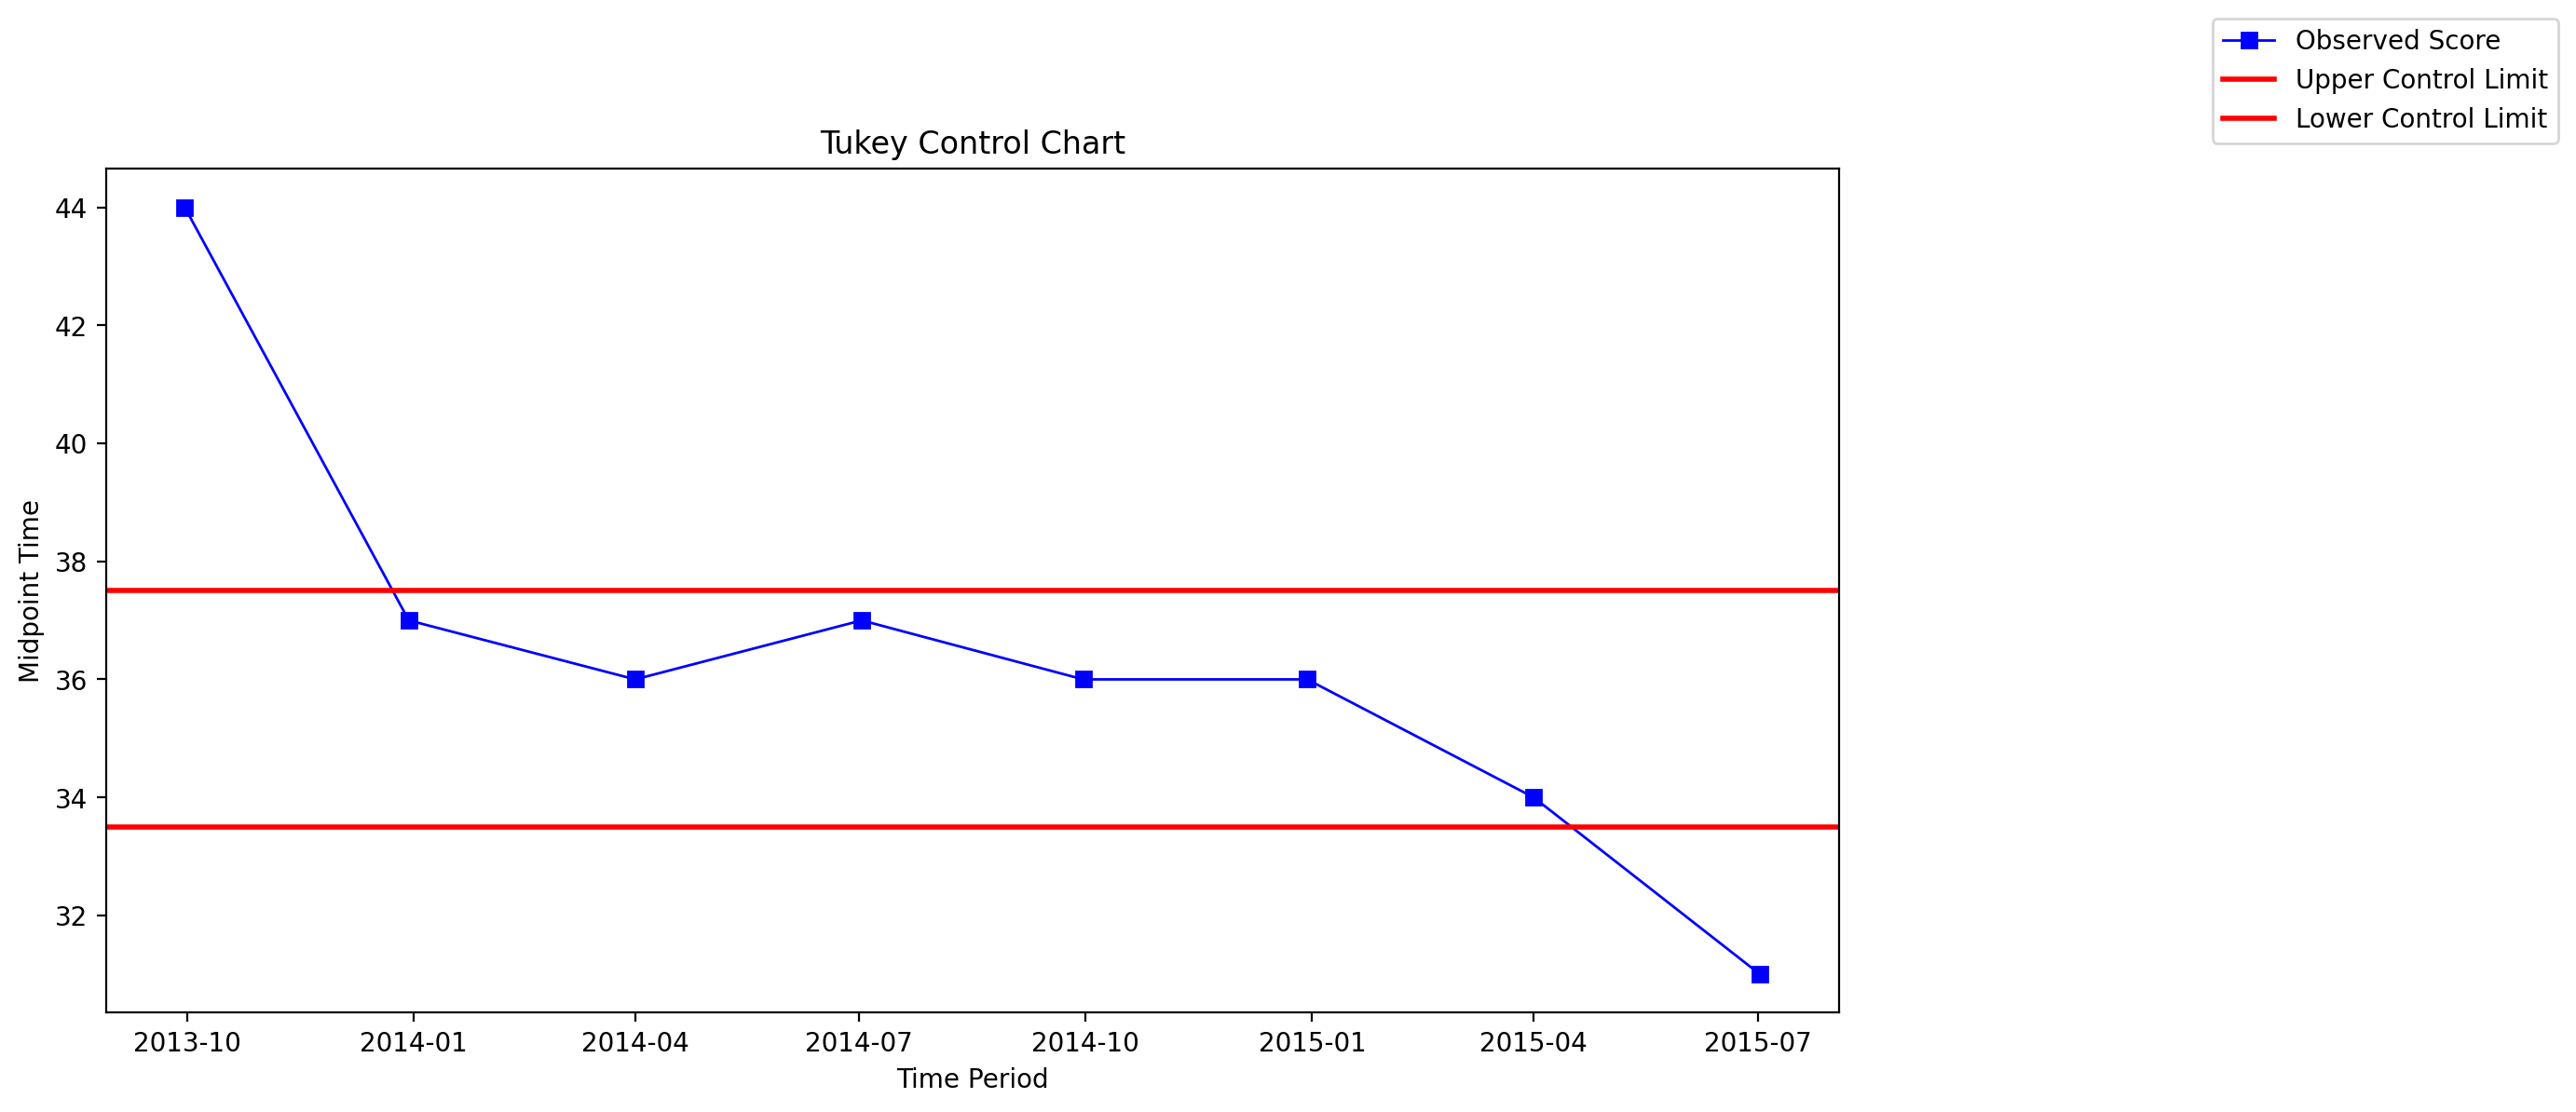

In [44]:
figure(figsize=(12,6),dpi=200)
plt.plot('Mid', 'Score', label = 'Observed Score',data=df, marker = 's', 
         markerfacecolor='blue',linewidth=1,color='blue')
plt.axhline(y=UCL,color='red',linewidth=2,label='Upper Control Limit')
plt.axhline(y=LCL,color='red',linewidth=2,label='Lower Control Limit')
plt.legend(bbox_to_anchor=(1.43,1),borderaxespad=1,loc='lower right')
plt.title('Tukey Control Chart')
plt.xlabel('Time Period')
plt.ylabel('Midpoint Time')

In [45]:
df.sort_values('Mid',inplace=True,ignore_index=True)
df['Binarized']= np.where(df['Score'] > Median,'Above','Below')
df.loc[0,'Consecutive Below Benchmark'] = np.where(df.loc[0,'Binarized']=='Above',0,1)
for index,row in df[1:].iterrows():
    if ((df.loc[index-1,'Binarized']=='Below')&(row['Binarized']=='Below')):
        df.loc[index,'Consecutive Below Benchmark']=df.loc[index-1,'Consecutive Below Benchmark'] + 1
    elif ((row['Binarized']=='Below')):
        df.loc[index,'Consecutive Below Benchmark'] = 1
    else:
        df.loc[index,'Consecutive Below Benchmark'] = 0
df

,Provider ID,Hospital Name,Condition,Measure ID,Measure Name,Score,Sample,Footnote,Measure Start Date,Measure End Date,Mid,Binarized,Consecutive Below Benchmark
0,490063,INOVA FAIRFAX HOSPITAL,Emergency Department,OP_21,Median time to pain med,44.0,379,NaN,2013-04-01,2014-03-31,2013-09-30,Above,0.0
1,490063,INOVA FAIRFAX HOSPITAL,Emergency Department,OP_21,Median time to pain med,37.0,342,NaN,2013-07-01,2014-06-30,2013-12-30,Above,0.0
2,490063,INOVA FAIRFAX HOSPITAL,Emergency Department,OP_21,Median time to pain med,36.0,314,NaN,2013-10-01,2014-09-30,2014-04-01,Below,1.0
3,490063,INOVA FAIRFAX HOSPITAL,Emergency Department,OP_21,Median time to pain med,37.0,336,NaN,2014-01-01,2014-12-31,2014-07-02,Above,0.0
4,490063,INOVA FAIRFAX HOSPITAL,Emergency Department,OP_21,Median time to pain med,36.0,349,NaN,2014-04-01,2015-03-31,2014-09-30,Below,1.0
5,490063,INOVA FAIRFAX HOSPITAL,Emergency Department,OP_21,Median time to pain med,36.0,347,NaN,2014-07-01,2015-06-30,2014-12-30,Below,2.0
6,490063,INOVA FAIRFAX HOSPITAL,Emergency Department,OP_21,Median time to pain med,34.0,342,NaN,2014-10-01,2015-09-30,2015-04-01,Below,3.0
7,490063,INOVA FAIRFAX HOSPITAL,Emergency Department,OP_21,Median time to pain med,31.0,317,NaN,2015-01-01,2015-12-31,2015-07-02,Below,4.0


In [46]:
Above_=len(df[df['Binarized']=='Above'])/len(df[df['Binarized']=='Below'])
Above_

0.6

In [47]:
Below_=len(df[df['Binarized']=='Below'])/len(df[df['Binarized']=='Above'])
Below_

1.6666666666666667

In [48]:
Check=min(Above_,Below_)
Check

0.6

In [49]:
UCL = Check + 3 * np.sqrt(Check * (1+Check))
UCL

3.539387691339814

<Figure size 2400x1200 with 0 Axes>

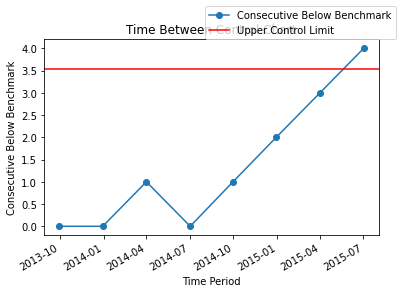

In [54]:
figure(figsize=(12,6),dpi=200)
df.plot(x='Mid', y = 'Consecutive Below Benchmark',marker='o',label = 'Consecutive Below Benchmark')
plt.axhline(y=UCL,color='red',label='Upper Control Limit')
plt.legend(bbox_to_anchor=(1.05,1),loc='lower right',borderaxespad=0.)
plt.title('Time Between Control Chart')
plt.xlabel('Time Period')
plt.ylabel('Consecutive Below Benchmark')
plt.show()

# Question4

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
#Import data and combine all sheets into one table
data=pd.concat(pd.read_excel('Q4.xlsx',sheet_name=None),ignore_index=True)
data=data[['ID','Neurosurgery','Urology','Genetics','Surgery','Echo','Neurology','Ultrasound']]
data

,ID,Neurosurgery,Urology,Genetics,Surgery,Echo,Neurology,Ultrasound
0,15,2017-01-10,NaT,NaT,NaT,NaT,NaT,NaT
1,32,2016-07-14,NaT,NaT,NaT,NaT,NaT,NaT
2,34,2016-07-27,NaT,NaT,NaT,NaT,NaT,NaT
3,77,2016-10-06,NaT,NaT,NaT,NaT,NaT,NaT
4,119,2016-08-16,NaT,NaT,NaT,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...
385,342,NaT,NaT,NaT,NaT,NaT,NaT,2017-05-08
386,343,NaT,NaT,NaT,NaT,NaT,NaT,2017-06-09
387,345,NaT,NaT,NaT,NaT,NaT,NaT,2017-05-30
388,351,NaT,NaT,NaT,NaT,NaT,NaT,2017-06-13


In [32]:
#Create new columns
data['Referral Date']=data.loc[:,'Neurosurgery':'Ultrasound'].fillna(method='ffill',axis=1)['Ultrasound']
data['Service']=data.loc[:,'Neurosurgery':'Ultrasound'].notna().dot(data.loc[:,'Neurosurgery':'Ultrasound'].columns+'')
data=data[['ID','Referral Date','Service']]
data['Year_Month'] = data['Referral Date'].astype(str).str[:7]
data

<ipython-input-32-f81906fa555f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year_Month'] = data['Referral Date'].astype(str).str[:7]


,ID,Referral Date,Service,Year_Month
0,15,2017-01-10,Neurosurgery,2017-01
1,32,2016-07-14,Neurosurgery,2016-07
2,34,2016-07-27,Neurosurgery,2016-07
3,77,2016-10-06,Neurosurgery,2016-10
4,119,2016-08-16,Neurosurgery,2016-08
...,...,...,...,...
385,342,2017-05-08,Ultrasound,2017-05
386,343,2017-06-09,Ultrasound,2017-06
387,345,2017-05-30,Ultrasound,2017-05
388,351,2017-06-13,Ultrasound,2017-06


In [33]:
#Create new data frame with column for total number of infants screened per month
data2=data.groupby('Year_Month')['ID'].count().reset_index(name='Total Number Screened')
data2

,Year_Month,Total Number Screened
0,2016-07,49
1,2016-08,43
2,2016-09,29
3,2016-10,33
4,2016-11,30
5,2016-12,42
6,2017-01,43
7,2017-02,21
8,2017-03,29
9,2017-04,18


In [34]:
UltraS_data = data2.merge(data[data['Service']=='Ultrasound'].groupby(['Year_Month'])['ID'].
              count().reset_index(name='Total Ultrasound Referrals'),how='left',on='Year_Month')
UltraS_data.fillna(0,inplace=True)
UltraS_data

,Year_Month,Total Number Screened,Total Ultrasound Referrals
0,2016-07,49,7
1,2016-08,43,3
2,2016-09,29,7
3,2016-10,33,6
4,2016-11,30,7
5,2016-12,42,12
6,2017-01,43,9
7,2017-02,21,7
8,2017-03,29,6
9,2017-04,18,3


In [36]:
#Calculate Probability
UltraS_data['Referral Prob']=round(UltraS_data['Total Ultrasound Referrals']/
                                  UltraS_data['Total Number Screened'],2)
p_bar = sum(UltraS_data['Total Ultrasound Referrals'])/sum(UltraS_data['Total Number Screened'])

#Calculate Standard  Deviation
UltraS_data['Standard Deviation'] = np.sqrt((p_bar*(1 - p_bar))/UltraS_data['Total Number Screened'])

#Calculate UCL and LCL
UltraS_data['Upper Control Limit'] = round(p_bar + 1.96 * UltraS_data['Standard Deviation'],2)
UltraS_data['Lower Control Limit'] = round(p_bar - 1.96 * UltraS_data['Standard Deviation'],2)
UltraS_data.loc[UltraS_data['Lower Control Limit']<0,'Lower Control Limit']=0
UltraS_data['Lower Control Limit'] = round(UltraS_data['Lower Control Limit'],1)
UltraS_data

,Year_Month,Total Number Screened,Total Ultrasound Referrals,Referral Prob,Standard Deviation,Upper Control Limit,Lower Control Limit
0,2016-07,49,7,0.14,0.057143,0.31,0.1
1,2016-08,43,3,0.07,0.060999,0.32,0.1
2,2016-09,29,7,0.24,0.074278,0.35,0.0
3,2016-10,33,6,0.18,0.069631,0.34,0.1
4,2016-11,30,7,0.23,0.073030,0.34,0.1
5,2016-12,42,12,0.29,0.061721,0.32,0.1
6,2017-01,43,9,0.21,0.060999,0.32,0.1
7,2017-02,21,7,0.33,0.087287,0.37,0.0
8,2017-03,29,6,0.21,0.074278,0.35,0.0
9,2017-04,18,3,0.17,0.094281,0.38,0.0


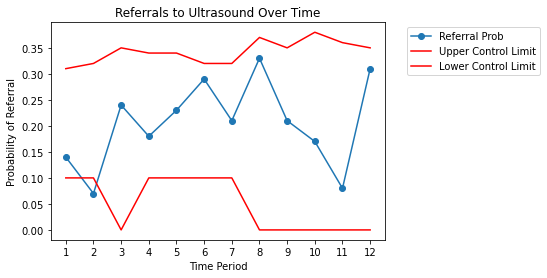

In [38]:
#Create Chart
#index will represent each time period to be graphed
UltraS_data.index = UltraS_data.index + 1

UltraS_data['Referral Prob'].plot(marker='o')
UltraS_data['Upper Control Limit'].plot(color='r')
UltraS_data['Lower Control Limit'].plot(color='r')
plt.title('Referrals to Ultrasound Over Time')
plt.ylabel('Probability of Referral')
plt.xlabel('Time Period')
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')
plt.xticks(UltraS_data.index.values)
plt.show()

# Conclusion

The rate of days-of-referrals to Ultrasound has changed over time with no clean pattern
however has stayed within our control limits,except for time period 2 (09-2016) which is
below the LCL. It would be imortant to evaluate the reason behind this change.

# Question5

In [39]:
#Import data and combine all sheets into one table
data=pd.concat(pd.read_excel('Q4.xlsx',sheet_name=None),ignore_index=True)
data=data[['ID','Neurosurgery','Urology','Genetics','Surgery','Echo','Neurology','Ultrasound']]
data

,ID,Neurosurgery,Urology,Genetics,Surgery,Echo,Neurology,Ultrasound
0,15,2017-01-10,NaT,NaT,NaT,NaT,NaT,NaT
1,32,2016-07-14,NaT,NaT,NaT,NaT,NaT,NaT
2,34,2016-07-27,NaT,NaT,NaT,NaT,NaT,NaT
3,77,2016-10-06,NaT,NaT,NaT,NaT,NaT,NaT
4,119,2016-08-16,NaT,NaT,NaT,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...
385,342,NaT,NaT,NaT,NaT,NaT,NaT,2017-05-08
386,343,NaT,NaT,NaT,NaT,NaT,NaT,2017-06-09
387,345,NaT,NaT,NaT,NaT,NaT,NaT,2017-05-30
388,351,NaT,NaT,NaT,NaT,NaT,NaT,2017-06-13


In [40]:
#Create new columns
data['Referral Date']=data.loc[:,'Neurosurgery':'Ultrasound'].fillna(method='ffill',axis=1)['Ultrasound']
data['Service']=data.loc[:,'Neurosurgery':'Ultrasound'].notna().dot(data.loc[:,'Neurosurgery':'Ultrasound'].columns+'')
data=data[['ID','Referral Date','Service']]
data

,ID,Referral Date,Service
0,15,2017-01-10,Neurosurgery
1,32,2016-07-14,Neurosurgery
2,34,2016-07-27,Neurosurgery
3,77,2016-10-06,Neurosurgery
4,119,2016-08-16,Neurosurgery
...,...,...,...
385,342,2017-05-08,Ultrasound
386,343,2017-06-09,Ultrasound
387,345,2017-05-30,Ultrasound
388,351,2017-06-13,Ultrasound


In [41]:
d=data.loc[data['Service'].isin(['Neurology','Ultrasound'])]
d

,ID,Referral Date,Service
273,1,2016-08-02,Neurology
274,3,2016-07-19,Neurology
275,7,2016-12-02,Neurology
276,9,2016-08-02,Neurology
277,14,2016-07-08,Neurology
...,...,...,...
385,342,2017-05-08,Ultrasound
386,343,2017-06-09,Ultrasound
387,345,2017-05-30,Ultrasound
388,351,2017-06-13,Ultrasound


In [44]:
#Sort the dates from earliest to latest
d.sort_values('Referral Date',inplace=True)
d

NU_data=d.reset_index(drop=True)
NU_data

<ipython-input-44-2117f9b753d8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.sort_values('Referral Date',inplace=True)


,ID,Referral Date,Service
0,62,2016-07-01,Ultrasound
1,71,2016-07-06,Ultrasound
2,14,2016-07-08,Neurology
3,17,2016-07-12,Ultrasound
4,85,2016-07-14,Ultrasound
...,...,...,...
112,319,2017-06-19,Neurology
113,332,2017-06-19,Ultrasound
114,332,2017-06-19,Neurology
115,304,2017-06-22,Ultrasound


In [45]:
#Create data frame with just Neurology Data
N_data=NU_data.loc[NU_data['Service']=='Neurology'].reset_index(drop=True)
N_data

,ID,Referral Date,Service
0,14,2016-07-08,Neurology
1,25,2016-07-18,Neurology
2,31,2016-07-18,Neurology
3,3,2016-07-19,Neurology
4,104,2016-07-29,Neurology
5,1,2016-08-02,Neurology
6,9,2016-08-02,Neurology
7,126,2016-08-08,Neurology
8,19,2016-08-08,Neurology
9,33,2016-08-08,Neurology


In [46]:
#Create data frame with Ultrasound data
U_data=NU_data.loc[NU_data['Service']=='Ultrasound'].reset_index(drop=True)
U_data

,ID,Referral Date,Service
0,62,2016-07-01,Ultrasound
1,71,2016-07-06,Ultrasound
2,17,2016-07-12,Ultrasound
3,85,2016-07-14,Ultrasound
4,50,2016-07-14,Ultrasound
...,...,...,...
73,352,2017-06-12,Ultrasound
74,351,2017-06-13,Ultrasound
75,332,2017-06-19,Ultrasound
76,304,2017-06-22,Ultrasound


In [47]:
#Calculate the difference between two consecutive visits for all dataframes

#Neurology + Ultrasound
NU_data['Consecutive Visit Diff'] = NU_data['Referral Date'].diff()
NU_data

,ID,Referral Date,Service,Consecutive Visit Diff
0,62,2016-07-01,Ultrasound,NaT
1,71,2016-07-06,Ultrasound,5 days
2,14,2016-07-08,Neurology,2 days
3,17,2016-07-12,Ultrasound,4 days
4,85,2016-07-14,Ultrasound,2 days
...,...,...,...,...
112,319,2017-06-19,Neurology,6 days
113,332,2017-06-19,Ultrasound,0 days
114,332,2017-06-19,Neurology,0 days
115,304,2017-06-22,Ultrasound,3 days


In [50]:
#Neurology
N_data['Consecutive Visit Diff'] = N_data['Referral Date'].diff()
N_data

,ID,Referral Date,Service,Consecutive Visit Diff
0,14,2016-07-08,Neurology,NaT
1,25,2016-07-18,Neurology,10 days
2,31,2016-07-18,Neurology,0 days
3,3,2016-07-19,Neurology,1 days
4,104,2016-07-29,Neurology,10 days
5,1,2016-08-02,Neurology,4 days
6,9,2016-08-02,Neurology,0 days
7,126,2016-08-08,Neurology,6 days
8,19,2016-08-08,Neurology,0 days
9,33,2016-08-08,Neurology,0 days


In [51]:
#Ultrasound
U_data['Consecutive Visit Diff'] = U_data['Referral Date'].diff()
U_data

,ID,Referral Date,Service,Consecutive Visit Diff
0,62,2016-07-01,Ultrasound,NaT
1,71,2016-07-06,Ultrasound,5 days
2,17,2016-07-12,Ultrasound,6 days
3,85,2016-07-14,Ultrasound,2 days
4,50,2016-07-14,Ultrasound,0 days
...,...,...,...,...
73,352,2017-06-12,Ultrasound,0 days
74,351,2017-06-13,Ultrasound,1 days
75,332,2017-06-19,Ultrasound,6 days
76,304,2017-06-22,Ultrasound,3 days


In [ ]:
#For all dataframe:
#Split the data into two equal sets
#Average the difference between two consecutive visits
#Convert timedelta values to get average days
#This provides "a", the average of days between two consecutive visits
#Calculate the daily probobility for each half using 1/a

In [67]:
#Neurology + Ultrasound: average the difference (days) between two consecutive visits

#First Half
NU_avg1=NU_data.loc[:len(NU_data)/2,'Consecutive Visit Diff'].mean()
NU_avg1

Timedelta('3 days 02:04:08.275862068')

In [68]:
#Second Half
NU_avg2=NU_data.loc[len(NU_data)/2+1:,'Consecutive Visit Diff'].mean()
NU_avg2

Timedelta('3 days 04:37:53.684210526')

In [69]:
#Neurology + Ultrasound: Convert timedelta values to get "a"

#First Half
NU_a1=NU_avg1.days + (NU_avg1.seconds)/84600
NU_a1

3.088037825059102

In [70]:
#Second Half
NU_a2=NU_avg2.days + (NU_avg2.seconds)/84600
NU_a2

3.197080378250591

In [71]:
#Neurology + Ultrasound: Calculate the daily probobility for each half

#First Half
NU_prob1 = 1/NU_a1
NU_prob1

0.3238302302792748

In [72]:
#Second Half
NU_prob2 = 1/NU_a2
NU_prob2

0.312785379686697

In [73]:
#Neurology: average the difference (days) between two consecutive visits

#First Half
N_avg1=N_data.loc[:len(N_data)/2,'Consecutive Visit Diff'].mean()
N_avg1

Timedelta('9 days 17:41:03.157894736')

In [74]:
#Second Half
N_avg2=N_data.loc[len(N_data)/2+1:,'Consecutive Visit Diff'].mean()
N_avg2

Timedelta('8 days 22:40:00')

In [75]:
#Neurology: Convert timedelta values to get "a" 

#First Half
N_a1=N_avg1.days + (N_avg1.seconds)/84600
N_a1

9.752517730496454

In [76]:
#Second Half
N_a2=N_avg2.days + (N_avg2.seconds)/84600
N_a2

8.964539007092199

In [77]:
#Neurology: Calculate the daily probobility for each half

#First Half
N_prob1 = 1/N_a1
N_prob1

0.10253762439959131

In [78]:
#Second Half
N_prob2 = 1/N_a2
N_prob2

0.1115506329113924

In [63]:
#Ultrasound: average the difference (days) between two consecutive visits

#First Half
U_avg1=U_data.loc[:len(U_data)/2,'Consecutive Visit Diff'].mean()
U_avg1

Timedelta('4 days 11:41:32.307692307')

In [64]:
#Second Half
U_avg2=U_data.loc[len(U_data)/2+1:,'Consecutive Visit Diff'].mean()
U_avg2

Timedelta('4 days 23:22:06.315789473')

In [79]:
#Ultrasound: Convert timedelta values to get "a"

#First Half
U_a1=U_avg1.days + (U_avg1.seconds)/84600
U_a1

4.497541371158392

In [80]:
#Second Half
U_a2=U_avg2.days + (U_avg2.seconds)/84600
U_a2

4.994397163120567

In [81]:
#Ultrasound: Calculate the daily probobility for each half

#First Half
U_prob1 = 1/U_a1
U_prob1

0.22234370236430728

In [82]:
#Second Half
U_prob2 = 1/U_a2
U_prob2

0.20022436489115464

In [85]:
final_table = [['Neurology', N_a1, N_prob1, N_a2, N_prob2], 
               ['Ultrasound',U_a1,U_prob2,U_a2,U_prob2],
               ['Neurology + Ultrasound', NU_a1, NU_prob1, U_a2, NU_prob2]]
final_table

[['Neurology',
  9.752517730496454,
  0.10253762439959131,
  8.964539007092199,
  0.1115506329113924],
 ['Ultrasound',
  4.497541371158392,
  0.20022436489115464,
  4.994397163120567,
  0.20022436489115464],
 ['Neurology + Ultrasound',
  3.088037825059102,
  0.3238302302792748,
  4.994397163120567,
  0.312785379686697]]

In [86]:
final_table2 = pd.DataFrame(final_table,columns=['Clinic','Average of 1st Half','Daily Probability 1st Half',
                                                'Average of 2nd Half','Daily Probability 2nd Half'])
final_table2

,Clinic,Average of 1st Half,Daily Probability 1st Half,Average of 2nd Half,Daily Probability 2nd Half
0,Neurology,9.752518,0.102538,8.964539,0.111551
1,Ultrasound,4.497541,0.200224,4.994397,0.200224
2,Neurology + Ultrasound,3.088038,0.323830,4.994397,0.312785


# Question6

In [97]:
#Import libraries
import pandas as pd
import numpy as np
from datetime import date, timedelta

In [98]:
data=pd.read_csv('WK9Q6.csv')
print(data)

  Employee_sale_info Clinician_social_gathering      Others
0          5/11/2017                  12/5/2018   5/11/2017
1         12/12/2019                  1/25/2019  11/22/2018
2                NaN                  5/27/2019  12/27/2019
3                NaN                   9/1/2019         NaN


In [99]:
#CALCULATE AVERAGE DAYS TO EVENT FOR EMPLOYEE SALE OF INFORMATION
E_D1=date(2017,5,11)
E_D2=date(2019,12,12)

In [100]:
Average_days_to_event_E = (E_D2-E_D1)
Average_days_to_event_E.days

945

In [103]:
C_D1=date(2018,12,5)
C_D2=date(2019,1,25)
C_D3=date(2019,5,27)
C_D4=date(2019,9,1)

In [102]:
Average_days_to_event_C = ((C_D2-C_D1)+(C_D3-C_D2)+(C_D4-C_D3))/3
Average_days_to_event_C.days

90

In [104]:
O_D1=date(2017,5,11)
O_D2=date(2018,11,22)
O_D3=date(2019,12,27)O

In [105]:
Average_days_to_event_O = ((O_D2-O_D1)+(O_D3-O_D2))/2
Average_days_to_event_O.days

480

In [106]:
P_E=1/Average_days_to_event_E.days
print(P_E)

0.0010582010582010583


In [107]:
P_O=1/Average_days_to_event_O.days
print(P_O)

0.0020833333333333333


In [108]:
P_C=1/Average_days_to_event_C.days
print(P_C)

0.011111111111111112
